In [1]:
from IPython.display import Image
import numpy as np

## Project - Option 1
### Coupled Simulation of a Power and Gas Network

- Emilio Osuna Aguilar

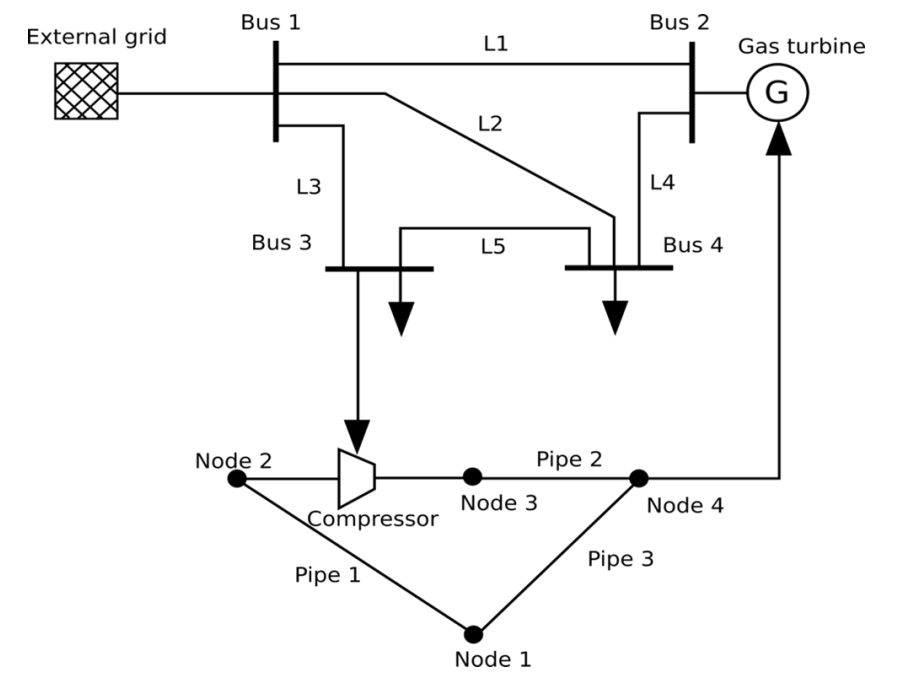

In [2]:
Image(filename='power_and_gas_system.png', width=600)

## Gas Network Simulation

In [3]:
import gas_network

In the gas network, nodes 2 and 3 were grouped and considered as demand nodes. Each node has an outgoing gas flow of 30 
$sm^3/s$. To determine the volumetric flow being compressed, a mass balance over node 2 (or node 3) is applied:

In [4]:
node_2_and_3_demand = 60.0  # sm^3/s

# Information about the gas turbine
turbine_power_output = 300e6  # W
heating_value = 35e6  # J/sm^3
efficiency = 0.60

# Calculate turbine gas consumption
power_input = turbine_power_output / efficiency
gas_demand_turbine = power_input / heating_value  # sm^3/s

print(f'Gas demand for the turbine: {gas_demand_turbine:.2f} sm^3/s')
compressor_power = gas_network.main(np.array([node_2_and_3_demand , gas_demand_turbine]))


Gas demand for the turbine: 14.29 sm^3/s
Simulation converges in 5 iterations!
P1: 5000000.0, P2: 3185466.8093395475, P3: 3504013.4902735027, P4: 4431953.626814185
Flow pipe 1: 39.992953207505664, flow pipe 2: -20.014084084388443 flow pipe 3: 34.29253646179122


## Power Flow Simulation

In [5]:
import power_flow

Using the parameters and variables provided in the description of the project:

In [6]:
power_flow.main()

Simulation converges in 8 iterations!
Norm of delta_x = 6.754345825779596e-07
Phases = [ 0.          0.07869898 -0.03010869  0.02004402]
Nodal Voltages = [115.5        112.2        111.65053213 111.44029932]
Line currents:
 L1: 0.95+0.76j L2: 0.06+0.29j L3: -1.10+0.72j L4: -1.64-0.36j L5: 0.68+0.22j


Considering he power consumption of the compressor from the gas network simulation, that is added to bus 3:

In [7]:
print(f'Compressor_power = {compressor_power:.2f} MW')
power_flow.main(turbine_power_generation=300, compressor_power=compressor_power)

Compressor_power = 0.10 MW
Simulation converges in 8 iterations!
Norm of delta_x = 6.74945290520007e-07
Phases = [ 0.          0.07870622 -0.03008603  0.02005451]
Nodal Voltages = [115.5        112.2        111.6513363  111.44055924]
Line currents:
 L1: 0.95+0.76j L2: 0.06+0.29j L3: -1.10+0.72j L4: -1.64-0.36j L5: 0.68+0.22j


## Co-Simulation


To address question 4, we first calculate the power consumption of the compressor within the gas network, taking into account the new gas demand for the turbine. We then incorporate this updated compressor power consumption into the power flow simulation, adding it to the existing load at Bus 3.

In [8]:
import gas_network
import power_flow

In [11]:
node_2_and_3_demand = 60.0  # sm^3/s
gas_demand_turbine = 20.0  # sm^3/s

compressor_power = gas_network.main(np.array([node_2_and_3_demand , gas_demand_turbine]))

# Information about the gas turbine
heating_value = 35e6  # J/sm^3
efficiency = 0.60

# Calculate turbine power generation
power_input = gas_demand_turbine * heating_value
turbine_power_generation = power_input * efficiency * (1e-6) # MW

power_flow.main(turbine_power_generation, -compressor_power)
print(f'Compressor_power = {compressor_power:.2f} MW')
print(f'Turbine_power = {turbine_power_generation:.2f} MW')

Simulation converges in 6 iterations!
P1: 5000000.0, P2: 3066594.1258786945, P3: 3373253.5384665644, P4: 4246135.529836026
Flow pipe 1: 40.981316956771494, flow pipe 2: -19.018164434232464 flow pipe 3: 39.01867128443435
Simulation converges in 9 iterations!
Norm of delta_x = 7.462696154030796e-07
Phases = [ 0.          0.12148124 -0.02146317  0.04685726]
Nodal Voltages = [115.5        112.2        111.57934546 111.30151432]
Line currents:
 L1: 1.52+0.99j L2: 0.24+0.36j L3: -0.87+0.80j L4: -2.07-0.55j L5: 0.92+0.32j
Compressor_power = 0.11 MW
Turbine_power = 420.00 MW
